<a href="https://colab.research.google.com/github/SaeidAbdolian/Mini-projects-of-images-processing/blob/main/order-statistic-minimum/order_statistic_min.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **order_statistic_min**

To apply an order statistic filter to an image, one typically uses 3x3, 5x5 or 7x7 windows. For non-Gaussian noise, the optimal OSF is superior to taking a local average for flat regions. The main problem with such filters is the underlying stationarity assumption: the derivation of the OSF assumes that X is a stationary point process, an assumption which is grossly violated if there is an edge, line, or other strong signal activity in the window. Figure 1.3 illustrates this for a test image degraded by additive white Gaussian noise with  . The median filter (lower left) preserves edges (the checkerboard and the bagel), but wipes out fine details (the text and lines). The 3x3 average, which is the optimal OSF for Gaussian noise, blurs too much.

+ + + ### **Minimum**, **Maximum**, and **Median** Filters

Morphological Filters: Minimum and Maximum
Morphological image processing is a technique introducing operations for transforming images in a special way which takes image content into account. The most common morphological operations are minimum (also known as dilation) and maximum (erosion) filters. The minimum filter extends object boundaries, whereas the maximum filter erodes shapes on the image.

In morphological filters, each pixel is updated based on comparing it against surrounding pixels in the running window. The running window is an image area around a current pixel with a defined radius. For example, if we specify the radius = 1, the running window will be a 3x3 square around the target pixel.

Transformations differ for all morphological operations.

* # **The Minimum Filter**

The transformation replaces the central pixel with the darkest one in the running window.

For example, if you have text that is lightly printed, the minimum filter makes letters thicker. 

<img src="https://www.graphicsmill.com/docs/gm/minF.png" >

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
!wget "https://i.pinimg.com/originals/46/36/d3/4636d34f40f37a4bf056bd373e25afd4.jpg" -O AMOL_IRAN.jpg

--2020-12-10 13:51:56--  https://i.pinimg.com/originals/46/36/d3/4636d34f40f37a4bf056bd373e25afd4.jpg
Resolving i.pinimg.com (i.pinimg.com)... 104.123.200.243, 2600:1402:800:29a::1931, 2600:1402:800:282::1931, ...
Connecting to i.pinimg.com (i.pinimg.com)|104.123.200.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 142536 (139K) [image/jpeg]
Saving to: ‘AMOL_IRAN.jpg’

AMOL_IRAN.jpg       100%[===================>] 139.20K  --.-KB/s    in 0.03s   

2020-12-10 13:51:56 (3.94 MB/s) - ‘AMOL_IRAN.jpg’ saved [142536/142536]



In [4]:
img = cv.imread('AMOL_IRAN.jpg')
if len(img.shape) == 3:
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [5]:
img = np.array(img)
shape = img.shape
output = np.zeros((shape[0], shape[1]), dtype='uint8')
step = 1
win = 3
for i in range(0, shape[0], step):
    for j in range(0, shape[1], step):
        if i <= int(win/2) or shape[0]-i <= int(win/2) or j <= int(win/2) or shape[1]-j <= int(win/2):
            continue
        kernel = img[i-int(win/2):i+int(win/2)+1, j-int(win/2):j+int(win/2)+1]              
        output[i, j] = np.min(kernel)

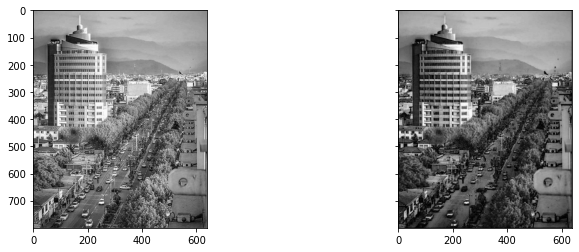

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (12,4))
ax1.imshow(img, cmap='gray')
ax2.imshow(output, cmap='gray')
plt.show()